# 순환 신경망(LSTM)모델 만들어보기 

- [출처 : 순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 1. 다층 퍼셉트론 모델(Multi-Layer Perceptron : MLP)

In [169]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
one hot encoding vector size is  12


In [170]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
 - 1s - loss: 2.4744 - acc: 0.1600
Epoch 2/2000
 - 0s - loss: 2.3733 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.2874 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.2076 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.1260 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0629 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9968 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9607 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9288 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9102 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8914 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8799 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8623 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8471 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8317 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8209 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.8100 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7983 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.7856 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.7793 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

Epoch 168/2000
 - 0s - loss: 1.2639 - acc: 0.5400
Epoch 169/2000
 - 0s - loss: 1.2608 - acc: 0.5600
Epoch 170/2000
 - 0s - loss: 1.2627 - acc: 0.5400
Epoch 171/2000
 - 0s - loss: 1.2560 - acc: 0.5400
Epoch 172/2000
 - 0s - loss: 1.2554 - acc: 0.5400
Epoch 173/2000
 - 0s - loss: 1.2462 - acc: 0.5600
Epoch 174/2000
 - 0s - loss: 1.2453 - acc: 0.5600
Epoch 175/2000
 - 0s - loss: 1.2474 - acc: 0.5600
Epoch 176/2000
 - 0s - loss: 1.2423 - acc: 0.5600
Epoch 177/2000
 - 0s - loss: 1.2399 - acc: 0.5400
Epoch 178/2000
 - 0s - loss: 1.2427 - acc: 0.5400
Epoch 179/2000
 - 0s - loss: 1.2419 - acc: 0.5600
Epoch 180/2000
 - 0s - loss: 1.2338 - acc: 0.5600
Epoch 181/2000
 - 0s - loss: 1.2350 - acc: 0.5600
Epoch 182/2000
 - 0s - loss: 1.2340 - acc: 0.5400
Epoch 183/2000
 - 0s - loss: 1.2325 - acc: 0.5400
Epoch 184/2000
 - 0s - loss: 1.2290 - acc: 0.5600
Epoch 185/2000
 - 0s - loss: 1.2273 - acc: 0.5600
Epoch 186/2000
 - 0s - loss: 1.2249 - acc: 0.5400
Epoch 187/2000
 - 0s - loss: 1.2182 - acc: 0.5400


Epoch 332/2000
 - 0s - loss: 0.9988 - acc: 0.6000
Epoch 333/2000
 - 0s - loss: 0.9917 - acc: 0.6000
Epoch 334/2000
 - 0s - loss: 1.0011 - acc: 0.6000
Epoch 335/2000
 - 0s - loss: 1.0015 - acc: 0.6000
Epoch 336/2000
 - 0s - loss: 0.9931 - acc: 0.5800
Epoch 337/2000
 - 0s - loss: 0.9943 - acc: 0.6000
Epoch 338/2000
 - 0s - loss: 0.9961 - acc: 0.5800
Epoch 339/2000
 - 0s - loss: 0.9953 - acc: 0.5800
Epoch 340/2000
 - 0s - loss: 0.9835 - acc: 0.6000
Epoch 341/2000
 - 0s - loss: 0.9925 - acc: 0.5800
Epoch 342/2000
 - 0s - loss: 0.9902 - acc: 0.5800
Epoch 343/2000
 - 0s - loss: 0.9817 - acc: 0.6000
Epoch 344/2000
 - 0s - loss: 0.9814 - acc: 0.6000
Epoch 345/2000
 - 0s - loss: 0.9835 - acc: 0.5800
Epoch 346/2000
 - 0s - loss: 0.9798 - acc: 0.5800
Epoch 347/2000
 - 0s - loss: 0.9810 - acc: 0.5800
Epoch 348/2000
 - 0s - loss: 0.9915 - acc: 0.6000
Epoch 349/2000
 - 0s - loss: 0.9716 - acc: 0.6000
Epoch 350/2000
 - 0s - loss: 0.9727 - acc: 0.6000
Epoch 351/2000
 - 0s - loss: 0.9751 - acc: 0.6000


Epoch 496/2000
 - 0s - loss: 0.8220 - acc: 0.6800
Epoch 497/2000
 - 0s - loss: 0.8147 - acc: 0.7000
Epoch 498/2000
 - 0s - loss: 0.8168 - acc: 0.6800
Epoch 499/2000
 - 0s - loss: 0.8186 - acc: 0.6600
Epoch 500/2000
 - 0s - loss: 0.8156 - acc: 0.7000
Epoch 501/2000
 - 0s - loss: 0.8121 - acc: 0.6800
Epoch 502/2000
 - 0s - loss: 0.8174 - acc: 0.6800
Epoch 503/2000
 - 0s - loss: 0.8139 - acc: 0.6600
Epoch 504/2000
 - 0s - loss: 0.8162 - acc: 0.6600
Epoch 505/2000
 - 0s - loss: 0.8168 - acc: 0.6600
Epoch 506/2000
 - 0s - loss: 0.8185 - acc: 0.6800
Epoch 507/2000
 - 0s - loss: 0.8144 - acc: 0.6800
Epoch 508/2000
 - 0s - loss: 0.8146 - acc: 0.6800
Epoch 509/2000
 - 0s - loss: 0.8059 - acc: 0.6600
Epoch 510/2000
 - 0s - loss: 0.8044 - acc: 0.6800
Epoch 511/2000
 - 0s - loss: 0.8149 - acc: 0.6600
Epoch 512/2000
 - 0s - loss: 0.7993 - acc: 0.7000
Epoch 513/2000
 - 0s - loss: 0.8075 - acc: 0.6800
Epoch 514/2000
 - 0s - loss: 0.8040 - acc: 0.7000
Epoch 515/2000
 - 0s - loss: 0.7985 - acc: 0.6800


Epoch 660/2000
 - 0s - loss: 0.6743 - acc: 0.7600
Epoch 661/2000
 - 0s - loss: 0.6782 - acc: 0.7400
Epoch 662/2000
 - 0s - loss: 0.6725 - acc: 0.7600
Epoch 663/2000
 - 0s - loss: 0.6722 - acc: 0.8000
Epoch 664/2000
 - 0s - loss: 0.6839 - acc: 0.8000
Epoch 665/2000
 - 0s - loss: 0.6647 - acc: 0.7600
Epoch 666/2000
 - 0s - loss: 0.6798 - acc: 0.7400
Epoch 667/2000
 - 0s - loss: 0.6682 - acc: 0.7400
Epoch 668/2000
 - 0s - loss: 0.6671 - acc: 0.7200
Epoch 669/2000
 - 0s - loss: 0.6678 - acc: 0.7600
Epoch 670/2000
 - 0s - loss: 0.6726 - acc: 0.7400
Epoch 671/2000
 - 0s - loss: 0.6725 - acc: 0.7400
Epoch 672/2000
 - 0s - loss: 0.6645 - acc: 0.7800
Epoch 673/2000
 - 0s - loss: 0.6674 - acc: 0.7200
Epoch 674/2000
 - 0s - loss: 0.6657 - acc: 0.7200
Epoch 675/2000
 - 0s - loss: 0.6716 - acc: 0.7800
Epoch 676/2000
 - 0s - loss: 0.6579 - acc: 0.7800
Epoch 677/2000
 - 0s - loss: 0.6658 - acc: 0.7400
Epoch 678/2000
 - 0s - loss: 0.6599 - acc: 0.7400
Epoch 679/2000
 - 0s - loss: 0.6635 - acc: 0.7800


Epoch 824/2000
 - 0s - loss: 0.5441 - acc: 0.8000
Epoch 825/2000
 - 0s - loss: 0.5467 - acc: 0.7800
Epoch 826/2000
 - 0s - loss: 0.5395 - acc: 0.8200
Epoch 827/2000
 - 0s - loss: 0.5383 - acc: 0.8000
Epoch 828/2000
 - 0s - loss: 0.5392 - acc: 0.8000
Epoch 829/2000
 - 0s - loss: 0.5396 - acc: 0.8000
Epoch 830/2000
 - 0s - loss: 0.5390 - acc: 0.8400
Epoch 831/2000
 - 0s - loss: 0.5385 - acc: 0.8000
Epoch 832/2000
 - 0s - loss: 0.5476 - acc: 0.8000
Epoch 833/2000
 - 0s - loss: 0.5319 - acc: 0.8000
Epoch 834/2000
 - 0s - loss: 0.5378 - acc: 0.8200
Epoch 835/2000
 - 0s - loss: 0.5294 - acc: 0.8400
Epoch 836/2000
 - 0s - loss: 0.5315 - acc: 0.8200
Epoch 837/2000
 - 0s - loss: 0.5386 - acc: 0.8000
Epoch 838/2000
 - 0s - loss: 0.5294 - acc: 0.8400
Epoch 839/2000
 - 0s - loss: 0.5379 - acc: 0.8200
Epoch 840/2000
 - 0s - loss: 0.5354 - acc: 0.8400
Epoch 841/2000
 - 0s - loss: 0.5305 - acc: 0.8000
Epoch 842/2000
 - 0s - loss: 0.5354 - acc: 0.8000
Epoch 843/2000
 - 0s - loss: 0.5261 - acc: 0.8200


Epoch 988/2000
 - 0s - loss: 0.4404 - acc: 0.8400
Epoch 989/2000
 - 0s - loss: 0.4370 - acc: 0.8400
Epoch 990/2000
 - 0s - loss: 0.4314 - acc: 0.8600
Epoch 991/2000
 - 0s - loss: 0.4319 - acc: 0.8400
Epoch 992/2000
 - 0s - loss: 0.4309 - acc: 0.8600
Epoch 993/2000
 - 0s - loss: 0.4321 - acc: 0.8800
Epoch 994/2000
 - 0s - loss: 0.4286 - acc: 0.8800
Epoch 995/2000
 - 0s - loss: 0.4220 - acc: 0.8600
Epoch 996/2000
 - 0s - loss: 0.4266 - acc: 0.8400
Epoch 997/2000
 - 0s - loss: 0.4262 - acc: 0.8800
Epoch 998/2000
 - 0s - loss: 0.4225 - acc: 0.8800
Epoch 999/2000
 - 0s - loss: 0.4200 - acc: 0.8600
Epoch 1000/2000
 - 0s - loss: 0.4269 - acc: 0.8800
Epoch 1001/2000
 - 0s - loss: 0.4199 - acc: 0.8800
Epoch 1002/2000
 - 0s - loss: 0.4227 - acc: 0.8800
Epoch 1003/2000
 - 0s - loss: 0.4172 - acc: 0.8600
Epoch 1004/2000
 - 0s - loss: 0.4214 - acc: 0.9000
Epoch 1005/2000
 - 0s - loss: 0.4135 - acc: 0.9000
Epoch 1006/2000
 - 0s - loss: 0.4253 - acc: 0.8800
Epoch 1007/2000
 - 0s - loss: 0.4231 - acc:

Epoch 1149/2000
 - 0s - loss: 0.3509 - acc: 0.9200
Epoch 1150/2000
 - 0s - loss: 0.3463 - acc: 0.9200
Epoch 1151/2000
 - 0s - loss: 0.3463 - acc: 0.9200
Epoch 1152/2000
 - 0s - loss: 0.3714 - acc: 0.8600
Epoch 1153/2000
 - 0s - loss: 0.3568 - acc: 0.9200
Epoch 1154/2000
 - 0s - loss: 0.3522 - acc: 0.9200
Epoch 1155/2000
 - 0s - loss: 0.3417 - acc: 0.9200
Epoch 1156/2000
 - 0s - loss: 0.3409 - acc: 0.9200
Epoch 1157/2000
 - 0s - loss: 0.3421 - acc: 0.9200
Epoch 1158/2000
 - 0s - loss: 0.3428 - acc: 0.9200
Epoch 1159/2000
 - 0s - loss: 0.3418 - acc: 0.9200
Epoch 1160/2000
 - 0s - loss: 0.3475 - acc: 0.9200
Epoch 1161/2000
 - 0s - loss: 0.3514 - acc: 0.9000
Epoch 1162/2000
 - 0s - loss: 0.3468 - acc: 0.9000
Epoch 1163/2000
 - 0s - loss: 0.3443 - acc: 0.8800
Epoch 1164/2000
 - 0s - loss: 0.3576 - acc: 0.9000
Epoch 1165/2000
 - 0s - loss: 0.3383 - acc: 0.9200
Epoch 1166/2000
 - 0s - loss: 0.3315 - acc: 0.9200
Epoch 1167/2000
 - 0s - loss: 0.3427 - acc: 0.9000
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.2859 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0.3001 - acc: 0.9000
Epoch 1312/2000
 - 0s - loss: 0.2822 - acc: 0.9200
Epoch 1313/2000
 - 0s - loss: 0.2951 - acc: 0.9200
Epoch 1314/2000
 - 0s - loss: 0.2850 - acc: 0.9200
Epoch 1315/2000
 - 0s - loss: 0.2935 - acc: 0.9000
Epoch 1316/2000
 - 0s - loss: 0.2848 - acc: 0.9000
Epoch 1317/2000
 - 0s - loss: 0.2875 - acc: 0.9200
Epoch 1318/2000
 - 0s - loss: 0.2896 - acc: 0.9200
Epoch 1319/2000
 - 0s - loss: 0.2900 - acc: 0.9000
Epoch 1320/2000
 - 0s - loss: 0.2922 - acc: 0.9000
Epoch 1321/2000
 - 0s - loss: 0.2897 - acc: 0.9200
Epoch 1322/2000
 - 0s - loss: 0.2858 - acc: 0.9200
Epoch 1323/2000
 - 0s - loss: 0.2818 - acc: 0.9200
Epoch 1324/2000
 - 0s - loss: 0.2871 - acc: 0.9200
Epoch 1325/2000
 - 0s - loss: 0.2997 - acc: 0.9000
Epoch 1326/2000
 - 0s - loss: 0.2756 - acc: 0.9000
Epoch 1327/2000
 - 0s - loss: 0.2800 - acc: 0.9200
Epoch 1328/2000
 - 0s - loss: 0.2865 - acc: 0.9000
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.2398 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0.2598 - acc: 0.9200
Epoch 1473/2000
 - 0s - loss: 0.2685 - acc: 0.9000
Epoch 1474/2000
 - 0s - loss: 0.2580 - acc: 0.9000
Epoch 1475/2000
 - 0s - loss: 0.2415 - acc: 0.9200
Epoch 1476/2000
 - 0s - loss: 0.2695 - acc: 0.9200
Epoch 1477/2000
 - 0s - loss: 0.2509 - acc: 0.9200
Epoch 1478/2000
 - 0s - loss: 0.2413 - acc: 0.9200
Epoch 1479/2000
 - 0s - loss: 0.2481 - acc: 0.9200
Epoch 1480/2000
 - 0s - loss: 0.2342 - acc: 0.9200
Epoch 1481/2000
 - 0s - loss: 0.2409 - acc: 0.9000
Epoch 1482/2000
 - 0s - loss: 0.2441 - acc: 0.9200
Epoch 1483/2000
 - 0s - loss: 0.2381 - acc: 0.9200
Epoch 1484/2000
 - 0s - loss: 0.2373 - acc: 0.9200
Epoch 1485/2000
 - 0s - loss: 0.2373 - acc: 0.9200
Epoch 1486/2000
 - 0s - loss: 0.2473 - acc: 0.9200
Epoch 1487/2000
 - 0s - loss: 0.2470 - acc: 0.9400
Epoch 1488/2000
 - 0s - loss: 0.2488 - acc: 0.9200
Epoch 1489/2000
 - 0s - loss: 0.2483 - acc: 0.9000
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.2172 - acc: 0.9000
Epoch 1633/2000
 - 0s - loss: 0.2123 - acc: 0.9200
Epoch 1634/2000
 - 0s - loss: 0.2190 - acc: 0.8800
Epoch 1635/2000
 - 0s - loss: 0.2112 - acc: 0.9200
Epoch 1636/2000
 - 0s - loss: 0.2139 - acc: 0.9200
Epoch 1637/2000
 - 0s - loss: 0.2077 - acc: 0.9000
Epoch 1638/2000
 - 0s - loss: 0.2134 - acc: 0.9200
Epoch 1639/2000
 - 0s - loss: 0.2077 - acc: 0.9200
Epoch 1640/2000
 - 0s - loss: 0.2092 - acc: 0.9200
Epoch 1641/2000
 - 0s - loss: 0.2123 - acc: 0.9200
Epoch 1642/2000
 - 0s - loss: 0.2042 - acc: 0.9200
Epoch 1643/2000
 - 0s - loss: 0.2142 - acc: 0.9200
Epoch 1644/2000
 - 0s - loss: 0.2205 - acc: 0.9200
Epoch 1645/2000
 - 0s - loss: 0.2072 - acc: 0.9200
Epoch 1646/2000
 - 0s - loss: 0.2169 - acc: 0.9000
Epoch 1647/2000
 - 0s - loss: 0.2174 - acc: 0.9200
Epoch 1648/2000
 - 0s - loss: 0.2187 - acc: 0.9200
Epoch 1649/2000
 - 0s - loss: 0.2301 - acc: 0.8800
Epoch 1650/2000
 - 0s - loss: 0.2125 - acc: 0.9000
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.1869 - acc: 0.9000
Epoch 1794/2000
 - 0s - loss: 0.1968 - acc: 0.9000
Epoch 1795/2000
 - 0s - loss: 0.1946 - acc: 0.9200
Epoch 1796/2000
 - 0s - loss: 0.1909 - acc: 0.9000
Epoch 1797/2000
 - 0s - loss: 0.1879 - acc: 0.9200
Epoch 1798/2000
 - 0s - loss: 0.1875 - acc: 0.9200
Epoch 1799/2000
 - 0s - loss: 0.1898 - acc: 0.9200
Epoch 1800/2000
 - 0s - loss: 0.1926 - acc: 0.9200
Epoch 1801/2000
 - 0s - loss: 0.1882 - acc: 0.9200
Epoch 1802/2000
 - 0s - loss: 0.1904 - acc: 0.9000
Epoch 1803/2000
 - 0s - loss: 0.1927 - acc: 0.9200
Epoch 1804/2000
 - 0s - loss: 0.1950 - acc: 0.9200
Epoch 1805/2000
 - 0s - loss: 0.1852 - acc: 0.9200
Epoch 1806/2000
 - 0s - loss: 0.1871 - acc: 0.9200
Epoch 1807/2000
 - 0s - loss: 0.2026 - acc: 0.9000
Epoch 1808/2000
 - 0s - loss: 0.1890 - acc: 0.9000
Epoch 1809/2000
 - 0s - loss: 0.1859 - acc: 0.9000
Epoch 1810/2000
 - 0s - loss: 0.1883 - acc: 0.9400
Epoch 1811/2000
 - 0s - loss: 0.1852 - acc: 0.9200
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.1776 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0.1768 - acc: 0.8800
Epoch 1956/2000
 - 0s - loss: 0.1740 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.1860 - acc: 0.9200
Epoch 1958/2000
 - 0s - loss: 0.1816 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.1789 - acc: 0.9200
Epoch 1960/2000
 - 0s - loss: 0.1846 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.1774 - acc: 0.9200
Epoch 1962/2000
 - 0s - loss: 0.1764 - acc: 0.9200
Epoch 1963/2000
 - 0s - loss: 0.1856 - acc: 0.9200
Epoch 1964/2000
 - 0s - loss: 0.1749 - acc: 0.9200
Epoch 1965/2000
 - 0s - loss: 0.1736 - acc: 0.9200
Epoch 1966/2000
 - 0s - loss: 0.1848 - acc: 0.8800
Epoch 1967/2000
 - 0s - loss: 0.1828 - acc: 0.8800
Epoch 1968/2000
 - 0s - loss: 0.1738 - acc: 0.9200
Epoch 1969/2000
 - 0s - loss: 0.1730 - acc: 0.9200
Epoch 1970/2000
 - 0s - loss: 0.1785 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.1729 - acc: 0.9200
Epoch 1972/2000
 - 0s - loss: 0.1668 - acc: 0.9200
Epoch 1973/2000
 - 0s - loss: 0

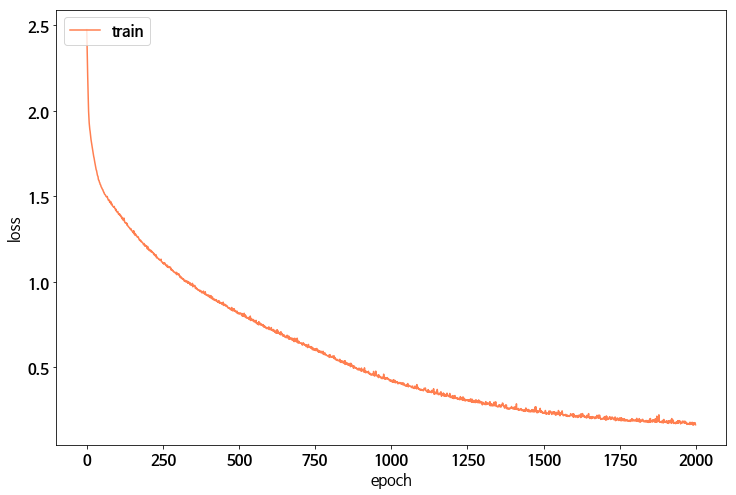

In [175]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12,8))
plt.plot(history.losses, color='coral')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [176]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

50/50 [==============================] - 0s 8ms/step
acc: 92.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
